# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **sports or athletics** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **sports or athletics**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **sports or athletics**?  For this category we are interested in sporting events or athletics broadly, please feel free to creatively interpret the category when building your research question!

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

### I wrote code to scrape data from the websites on my local machine because it did not work for the server notebook. 
<br>
I scraped the data from these websites on December 5, 2017. The webpages may change in the future.
<br>
* Basketball (Los Angeles Lakers) https://en.wikipedia.org/wiki/List_of_Los_Angeles_Lakers_seasons
* Hockey (Los Angeles Kings) https://en.wikipedia.org/wiki/List_of_Los_Angeles_Kings_seasons
* Baseball (Los Angeles Dodgers) https://en.wikipedia.org/wiki/List_of_Los_Angeles_Dodgers_seasons
* Football (Los Angeles Rams) https://en.wikipedia.org/wiki/List_of_Los_Angeles_Rams_seasons
<br>
<br>
I cleaned the data and saved them as .csv files. For the assignment, I uploaded the cleaned .csv files into my work area and loaded from there.

### Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load Data

In [2]:
df_lakers_cleaned = pd.read_csv( 'lakers_data_cleaned.csv', index_col = 0)
df_kings_cleaned = pd.read_csv( 'kings_data_cleaned.csv', index_col = 0)
df_dodgers_cleaned = pd.read_csv( 'dodgers_data_cleaned.csv', index_col = 0)
df_rams_cleaned = pd.read_csv( 'Rams_data_cleaned.csv', index_col = 0)

### Prep data for consumption

In [3]:
# NOTE: I Googled the team color.
list_prepped_data = \
[
('Lakers', 'purple', df_lakers_cleaned),
('Kings', 'grey', df_kings_cleaned),
('Dodgers', 'blue', df_dodgers_cleaned),
('Rams', 'orange', df_rams_cleaned) 
]

### Plot Moving Average (Rolling Mean) Graph.

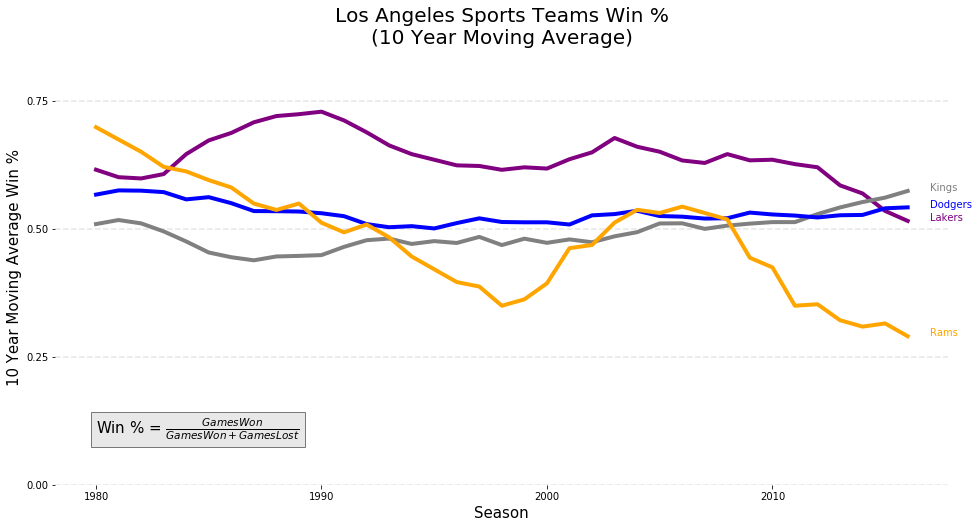

In [4]:
#---------------------- Functions (Start)--------------------------

def build_graph( plt = None,
                 df = None,
                 team_name = None,
                 team_color = None ):
    """
    Description: Creates plot on same figure.
    
    # TODO
    #
    # -Set title
    # -Set x label
    # -Set y lable
    # -Set x-axis to be the whole data but only show 10 year intervals
    # -Set y-axis for 0.0 to 1.0 but have dotted lines from 0.0, 0.25, 0.75, 1.0 BUT only use the highest that contain data.
    # -Set thick lines.
    # -Set dotted lines at y-axis intervals 
    # -Set annotations for names of team next to plot lines
    # -Set annotations for win%
    # -Remove plot box
    # -Change the name of the figure to be generic for all teams and the save image.
    """





    # Create graph
    plot_current_graph = plt.plot( df['Season'], 
                                   df['Rolling_Mean'],
                                   c=team_color,
                                   label='Lakers')


    # Set line thickness and style (like dotted)
    # https://matplotlib.org/examples/pylab_examples/set_and_get.html
    # plt.setp(plot_current_graph, 
    #          linestyle='--')
    plt.setp( plot_current_graph, 
              linewidth=4 )


    # x the year after the last year recorded
    x_pos = 2017
    
    # y is the height of the last value in the dataframe.
    y_pos =  df['Rolling_Mean'].iloc[-1]
    font_size = 10
    plt.text(x_pos,
             y_pos,
             team_name,
             color = team_color,
             fontsize = font_size)

#---------------------- Functions (End)--------------------------
    
#--------------------------------------
# Setup static features of graph.
# (Start)
#--------------------------------------

# Create new figure
fig_teams = plt.figure(figsize = (16,8))
ax = fig_teams.add_subplot(111)

# Remove axis
#plt.axis('off')
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Title
plt.title('Los Angeles Sports Teams Win %'
           '\n(10 Year Moving Average)',
           fontsize=20 )

# Labels for x and y axes
plt.xlabel( 'Season',
             fontsize=15 )
plt.ylabel( '10 Year Moving Average Win %',
            fontsize=15 )

# Set limit on x-axis
#ax.set_xlim([datetime.date(2016, 1, 1), datetime.date(2016, 12, 31)])
ax.set_ylim(0.0, 0.85)

# https://stackoverflow.com/questions/24943991/matplotlib-change-grid-interval-and-specify-tick-labels
#
# Set x-axis to be the whole data but only show 10 year intervals
x_major_ticks = np.arange(1980, 2020, 10)
#x_minor_ticks = np.arange(1980, 2020, 1)                                               
#
ax.set_xticks(x_major_ticks)                                                       
# ax.set_xticks(x_minor_ticks, minor=True)   
#
# Set y-axis for 0.0 to 1.0 but have dotted lines from 0.0, 0.25, 0.75, 1.0 BUT only use the highest that contain data.
y_major_ticks = np.arange(0.0, 1.1, 0.25)
#
# Slice to exclude the first and last entry.
y_major_ticks = y_major_ticks[:-1]
ax.set_yticks(y_major_ticks)

# Draw horizontal lines
for num in y_major_ticks:
    plt.axhline(y = num,
                linestyle = '--',
                color = 'grey',
                alpha = 0.2 )
    
# Legend
plt.text(1980,
         0.1,
         #'Win % = Games Won\(Games Won + Games Lost)',
         #r'$\frac{5 - \frac{1}{x}}{4}$',
         r'Win % = $\frac{Games Won}{Games Won + Games Lost}$',
         fontsize = 15,
         bbox={'facecolor':'lightgrey', 'alpha':0.5, 'pad':5})

#--------------------------------------
# Setup static features of graph.
# (End)
#--------------------------------------
    
# Cycle through the data and graph.
for i in range( len(list_prepped_data) ):
    
    # Current Data
    team_name, team_color, df = list_prepped_data[i]

    # Build the graph.
    build_graph( # Pass the plot being worked on
                 plt = plt,

                 # Pass the dataframe being worked on.
                 df = df,

                 # The name of the team
                 team_name = team_name,

                 # The team color
                 team_color = team_color)
    


# Show the graph.
plt.show()

### Save graph to .png

In [5]:
fig_teams.savefig( 'Los_Angeles_Sports_Teams_Percent_Wins.png' )